# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import pprint
%matplotlib inline

# Import API key
from api_keys import weather_api_key 

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "./output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

596

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

name = []
lat = []
lng = []
temp = []
humid = []
clouds = []
wind = []
country = []
datetime = []
# Loop through cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    
    
    try:
        name.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        humid.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        datetime.append(response['dt'])
        results = (response['name'])
        print(f"Retrieving Results for " + results)
        
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")
        
    print("------------")

Retrieving Results for Srednekolymsk
------------
Retrieving Results for Araceli
------------
Retrieving Results for Touros
------------
Retrieving Results for Erzin
------------
Missing field/result... skipping.
------------
Retrieving Results for Cherskiy
------------
Retrieving Results for Zhigansk
------------
Retrieving Results for Booué
------------
Retrieving Results for Puerto Ayora
------------
Retrieving Results for Albany
------------
Retrieving Results for Rikitea
------------
Retrieving Results for Bredasdorp
------------
Missing field/result... skipping.
------------
Retrieving Results for Kushima
------------
Retrieving Results for Yangi Marg`ilon
------------
Retrieving Results for Chililabombwe
------------
Retrieving Results for Busselton
------------
Retrieving Results for Ryde
------------
Retrieving Results for Norman Wells
------------
Retrieving Results for Punta Arenas
------------
Retrieving Results for Tuktoyaktuk
------------
Retrieving Results for San José d

Retrieving Results for New Norfolk
------------
Retrieving Results for Pontian Kecil
------------
Retrieving Results for Kakonko
------------
Retrieving Results for Cervo
------------
Retrieving Results for Tiarei
------------
Retrieving Results for Vanavara
------------
Retrieving Results for Bathsheba
------------
Missing field/result... skipping.
------------
Retrieving Results for Honiara
------------
Retrieving Results for Puro
------------
Retrieving Results for Mukdahan
------------
Retrieving Results for Hirara
------------
Retrieving Results for Marawi
------------
Retrieving Results for Malanville
------------
Retrieving Results for Vila Velha
------------
Missing field/result... skipping.
------------
Retrieving Results for Pimenta Bueno
------------
Retrieving Results for Sovetskiy
------------
Retrieving Results for Banyo
------------
Retrieving Results for Bonavista
------------
Retrieving Results for La Orilla
------------
Missing field/result... skipping.
------------
R

Retrieving Results for Maumere
------------
Retrieving Results for Provideniya
------------
Retrieving Results for Florianópolis
------------
Retrieving Results for Road Town
------------
Retrieving Results for Lata
------------
Retrieving Results for Ust'-Shonosha
------------
Retrieving Results for Gizo Government Station
------------
Retrieving Results for Keminmaa
------------
Retrieving Results for Amga
------------
Retrieving Results for Beloha
------------
Retrieving Results for Ixtapa
------------
Missing field/result... skipping.
------------
Retrieving Results for Bani Walid
------------
Retrieving Results for Lorengau
------------
Retrieving Results for Arlit
------------
Retrieving Results for Vieques
------------
Retrieving Results for Shelburne
------------
Retrieving Results for Ust-Kuyga
------------
Retrieving Results for Avera
------------
Retrieving Results for Faanui
------------
Retrieving Results for Tajao
------------
Retrieving Results for Jiexiu
------------
Re

Retrieving Results for Ulaangom
------------
Retrieving Results for Anchorage
------------
Retrieving Results for Harper
------------
Retrieving Results for Turmalina
------------
Retrieving Results for Ozark
------------
Retrieving Results for Grand-Santi
------------
Retrieving Results for Susuman
------------
Retrieving Results for Arrondissement de Laon
------------
Retrieving Results for Herat Province
------------
Retrieving Results for San Jorge
------------
Retrieving Results for Mineiros
------------
Retrieving Results for Amboasary
------------
Retrieving Results for Puli
------------
Retrieving Results for Bāgeshwar
------------
Retrieving Results for Port Blair
------------
Retrieving Results for Mayumba
------------
Retrieving Results for Kropotkin
------------
Retrieving Results for Poum
------------
Retrieving Results for Arrifes
------------
Retrieving Results for Half Moon Bay
------------
Retrieving Results for Kirakira
------------
Retrieving Results for Portland
---

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
#Create a Dictionary
Raw_data = {"City":name,"Latitude": lat,"Longitude": lng, "Temperature": temp, "Humidity":humid, "Cloudiness": clouds,
           "Wind Speed": wind, "Country": country, "Datetime": datetime}
#Convert Dictionary to DataFrame
Weather_Results_df = pd.DataFrame(Raw_data)
#Write DataFrame to CSV file "cities.csv"
Weather_Results_df.to_csv(output_data_file)
Weather_Results_df.head()

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Country,Datetime
0,Srednekolymsk,67.45,153.68,-10.08,90,97,8.05,RU,1605588318
1,Araceli,10.55,119.99,83.89,80,77,15.14,PH,1605588318
2,Touros,-5.20,-35.46,77.00,88,20,4.70,BR,1605588318
3,Erzin,36.96,36.20,50.00,100,0,4.21,TR,1605588319
4,Cherskiy,68.75,161.30,-11.49,90,100,6.67,RU,1605588319


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

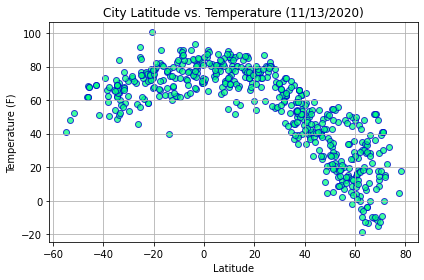

In [8]:
#Temperature (F) vs. Latitude

x_value= Weather_Results_df["Latitude"]
y_value= Weather_Results_df["Temperature"]
plt.title("City Latitude vs. Temperature (11/13/2020)")
plt.scatter(x_value,y_value, marker= "o", facecolors= "springgreen", edgecolors="mediumblue", alpha=0.75)
plt.xlabel('Latitude')
plt.ylabel("Temperature (F)")
plt.grid(True)
plt.tight_layout()
#plt.show()
plt.savefig("./output_data/Citiesfig1.png")


This plot shows correlation of the cities with the higher temperatures and being closest to the equator

## Latitude vs. Humidity Plot

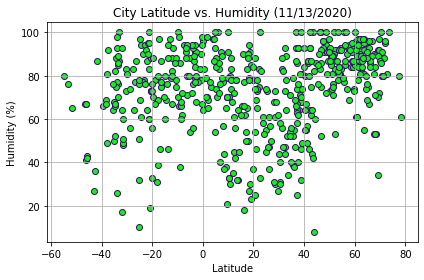

In [9]:
#Humidity (%) vs. Latitude
x_value= Weather_Results_df["Latitude"]
y_value= Weather_Results_df["Humidity"]
plt.title("City Latitude vs. Humidity (11/13/2020)")
plt.scatter(x_value,y_value, marker= "o", facecolors= "lime", edgecolors="indigo")
plt.xlabel('Latitude')
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.tight_layout()
#plt.show()
plt.savefig("./output_data/Citiesfig2.png")

This plot analyzing the humidity of cities shows that there are more cities between 50 and 80 degrees latitude with a higher humidity

## Latitude vs. Cloudiness Plot

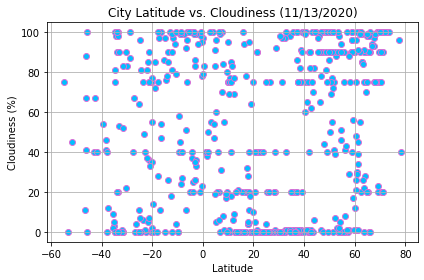

In [10]:
#Cloudiness (%) vs. Latitude
x_value= Weather_Results_df["Latitude"]
y_value= Weather_Results_df["Cloudiness"]
plt.title("City Latitude vs. Cloudiness (11/13/2020)")
plt.scatter(x_value,y_value, marker= "o", facecolors= "deepskyblue", edgecolors="orchid")
plt.xlabel('Latitude')
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.tight_layout()
#plt.show()
plt.savefig("./output_data/Citiesfig3.png")

From this plot analyzing the cloudiness and latitude there seems to be no correlation

## Latitude vs. Wind Speed Plot

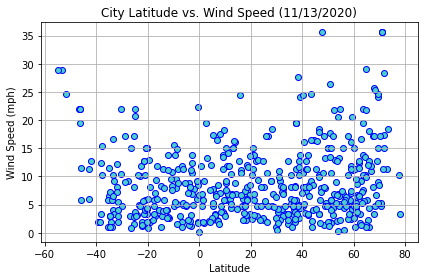

In [11]:
#Wind Speed (mph) vs. Latitude
x_value= Weather_Results_df["Latitude"]
y_value= Weather_Results_df["Wind Speed"]
plt.title("City Latitude vs. Wind Speed (11/13/2020)")
plt.scatter(x_value,y_value, marker= "o", facecolors= "mediumturquoise", edgecolors="blue")
plt.xlabel('Latitude')
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
plt.tight_layout()
#plt.show()
plt.savefig("./output_data/Citiesfig4.png")

This plot analyzing the correlation between wind speed and latitude shows more cities with higher wind speeds the closer to 80 degress latitude

## Linear Regression

In [12]:
Northern_hemisphere_df = Weather_Results_df.loc[Weather_Results_df["Latitude"]>=0]
Southern_hemisphere_df = Weather_Results_df.loc[Weather_Results_df["Latitude"]<0]
#print(type(Southern_hemisphere_df))

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R squared: 0.742156091960073


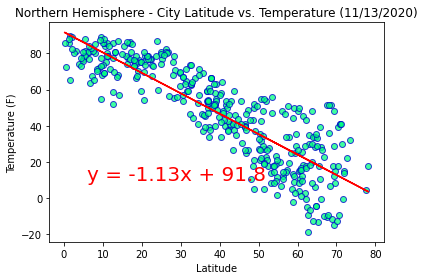

In [13]:
x_value= Northern_hemisphere_df["Latitude"]
y_value= Northern_hemisphere_df["Temperature"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_value,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=20,color="red")

plt.title("Northern Hemisphere - City Latitude vs. Temperature (11/13/2020)")
plt.scatter(x_value,y_value, marker= "o", facecolors= "springgreen", edgecolors="mediumblue", alpha=0.75)
plt.xlabel('Latitude')
plt.ylabel("Temperature (F)")
plt.tight_layout()
print(f"R squared: {rvalue**2}")
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

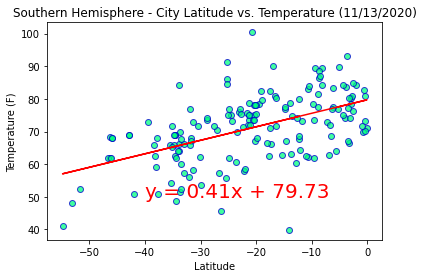

In [14]:
x_value= Southern_hemisphere_df["Latitude"]
y_value= Southern_hemisphere_df["Temperature"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_value,regress_values,"r-")
plt.annotate(line_eq,(-40,50),fontsize=20,color="red")

plt.title("Southern Hemisphere - City Latitude vs. Temperature (11/13/2020)")
plt.scatter(x_value,y_value, marker= "o", facecolors= "springgreen", edgecolors="mediumblue", alpha=0.75)
plt.xlabel('Latitude')
plt.ylabel("Temperature (F)")
plt.show()

Definite correlation between latitude and temperature in both Northern and Southern hemispheres, however you can see the linear regression changes angles between the Northern and Southern and seems there are much higher temperatures in the Southern hemisphere

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

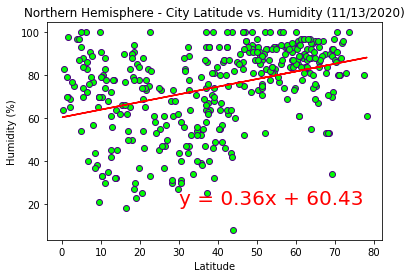

In [15]:
x_value= Northern_hemisphere_df["Latitude"]
y_value= Northern_hemisphere_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_value,regress_values,"r-")
plt.annotate(line_eq,(30,20),fontsize=20,color="red")

plt.title("Northern Hemisphere - City Latitude vs. Humidity (11/13/2020)")
plt.scatter(x_value,y_value, marker= "o", facecolors= "lime", edgecolors="indigo")
plt.xlabel('Latitude')
plt.ylabel("Humidity (%)")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

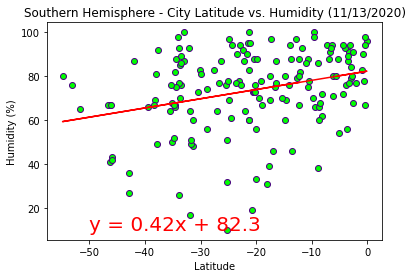

In [16]:
x_value= Southern_hemisphere_df["Latitude"]
y_value= Southern_hemisphere_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_value,regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=20,color="red")

plt.title("Southern Hemisphere - City Latitude vs. Humidity (11/13/2020)")
plt.scatter(x_value,y_value, marker= "o", facecolors= "lime", edgecolors="indigo")
plt.xlabel('Latitude')
plt.ylabel("Humidity (%)")
plt.show()

There is correlation between humidity and latitude and these plots show that in both the Northern and Southern hemispheres, the further towards 90 degrees latitude you go there tends to be higher humidity

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

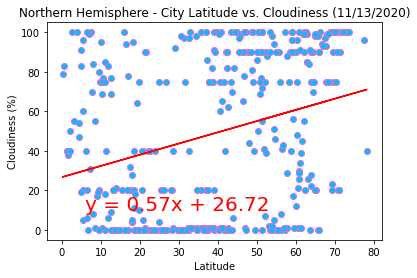

In [17]:
x_value= Northern_hemisphere_df["Latitude"]
y_value= Northern_hemisphere_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_value,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=20,color="red")

plt.title("Northern Hemisphere - City Latitude vs. Cloudiness (11/13/2020)")
plt.scatter(x_value,y_value, marker= "o", facecolors= "deepskyblue", edgecolors="orchid")
plt.xlabel('Latitude')
plt.ylabel("Cloudiness (%)")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

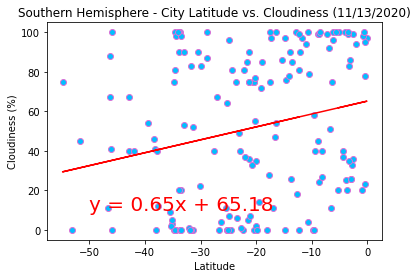

In [18]:
x_value= Southern_hemisphere_df["Latitude"]
y_value= Southern_hemisphere_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_value,regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=20,color="red")

plt.title("Southern Hemisphere - City Latitude vs. Cloudiness (11/13/2020)")
plt.scatter(x_value,y_value, marker= "o", facecolors= "deepskyblue", edgecolors="orchid")
plt.xlabel('Latitude')
plt.ylabel("Cloudiness (%)")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

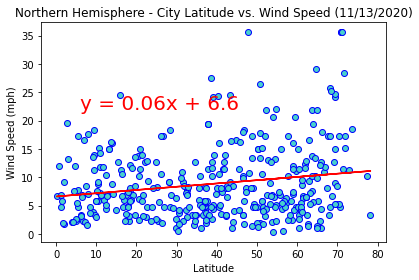

In [19]:
x_value= Northern_hemisphere_df["Latitude"]
y_value= Northern_hemisphere_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_value,regress_values,"r-")
plt.annotate(line_eq,(6,22),fontsize=20,color="red")

plt.title("Northern Hemisphere - City Latitude vs. Wind Speed (11/13/2020)")
plt.scatter(x_value,y_value, marker= "o", facecolors= "mediumturquoise", edgecolors="blue")
plt.xlabel('Latitude')
plt.ylabel("Wind Speed (mph)")
plt.tight_layout()
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

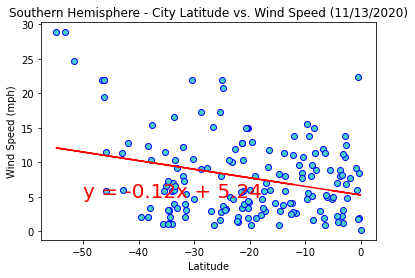

In [20]:
x_value= Southern_hemisphere_df["Latitude"]
y_value= Southern_hemisphere_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_value,regress_values,"r-")
plt.annotate(line_eq,(-50,5),fontsize=20,color="red")

plt.title("Southern Hemisphere - City Latitude vs. Wind Speed (11/13/2020)")
plt.scatter(x_value,y_value, marker= "o", facecolors= "mediumturquoise", edgecolors="blue")
plt.xlabel('Latitude')
plt.ylabel("Wind Speed (mph)")
plt.show()

the linear regression shows there is very little correlation between the wind speed and latitude in the Northern Hemisphere, however the Southern Hemisphere seems to show more correlation